# Classification on MNIST data

Trained Resnet-18 model for image classification

In [1]:
from fastai.vision import *
from fastai.metrics import error_rate

In [2]:
path = untar_data(URLs.MNIST_SAMPLE); path

WindowsPath('C:/Users/Ruchika/.fastai/data/mnist_sample')

In [3]:
path.ls()

[WindowsPath('C:/Users/Ruchika/.fastai/data/mnist_sample/labels.csv'),
 WindowsPath('C:/Users/Ruchika/.fastai/data/mnist_sample/train'),
 WindowsPath('C:/Users/Ruchika/.fastai/data/mnist_sample/valid')]

In [4]:
tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(path, ds_tfms=tfms, size=26)

In [5]:
data

ImageDataBunch;

Train: LabelList (12396 items)
x: ImageList
Image (3, 26, 26),Image (3, 26, 26),Image (3, 26, 26),Image (3, 26, 26),Image (3, 26, 26)
y: CategoryList
3,3,3,3,3
Path: C:\Users\Ruchika\.fastai\data\mnist_sample;

Valid: LabelList (2038 items)
x: ImageList
Image (3, 26, 26),Image (3, 26, 26),Image (3, 26, 26),Image (3, 26, 26),Image (3, 26, 26)
y: CategoryList
3,3,3,3,3
Path: C:\Users\Ruchika\.fastai\data\mnist_sample;

Test: None

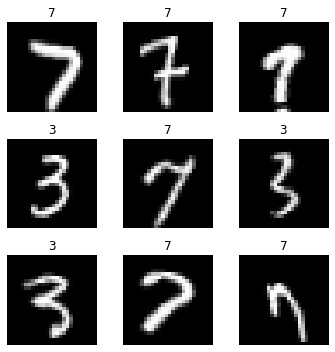

In [6]:
data.show_batch(rows=3, figsize=(5,5))

In [7]:
print(data.classes)

['3', '7']


In [8]:
learn = cnn_learner(data, models.resnet18, metrics=accuracy)

In [9]:
learn.fit(2)

epoch,train_loss,valid_loss,accuracy,time
0,0.198315,0.097684,0.968106,03:03
1,0.123494,0.055488,0.982336,03:48


In [10]:
df = pd.read_csv(path/'labels.csv')
df.head()

,name,label
0,train/3/7463.png,0
1,train/3/21102.png,0
2,train/3/31559.png,0
3,train/3/46882.png,0
4,train/3/26209.png,0


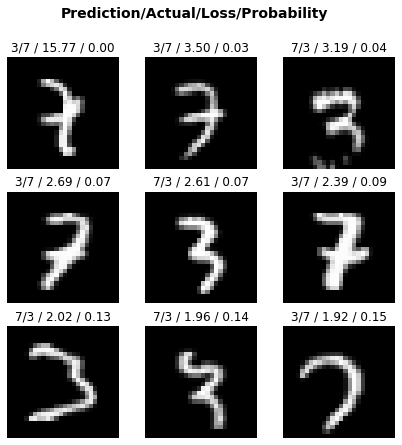

In [16]:
# Show predicted labels
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(9, figsize = (7,7))

In [17]:
fn_paths = [path/name for name in df['name']]; fn_paths[:2]

[WindowsPath('C:/Users/Ruchika/.fastai/data/mnist_sample/train/3/7463.png'),
 WindowsPath('C:/Users/Ruchika/.fastai/data/mnist_sample/train/3/21102.png')]

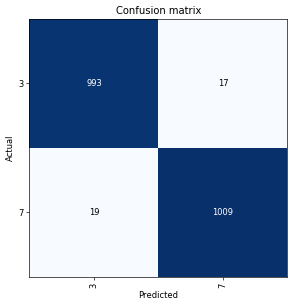

In [18]:
interp.plot_confusion_matrix(figsize = (5,5), dpi = 60)

In [19]:
# labels = [('3' if '/3/' in str(x) else '7') for x in fn_paths]
# labels[:5]